### Parameters to study

| Algorithm             | Step Size (lr) | Momentum Param | Regularization Param | Stochastic Aspect | Dataset_size |
|-----------------------|:--------------:|:-------------:|:--------------------:|:-----------------:| ------------:|
| Gradient              | X              |               |                     |                  |         |
| Accelerated Gradient  | X              | X             |                     |                  |        |
| Sub-gradient          | X              |               |                     |                  |       |
| Proximal Gradient     | X              |               | X                   |                  |      |
| Stochastic Gradient   | X              |               |                     | batch size/w or without shuffle                |


### for the svm problem
Modifying the distribution, the sample size and the c parameter

In [2]:
from functions import *


#set the seed
np.random.seed(0)


#set the number of samples and the dimension of the data
n = 10000
d = 100
#Generate a dataset
X, y = generate_dataset(n, d)
A = np.c_[np.ones(n), X]


In [ ]:
import pandas as pd
import numpy as np
import time

# We assume that 'A' (shape (n,d+1)), 'y' (shape (n,)), and 'd' are already defined.

#create an array of learning rates from 0.0001 to 0.5
learning_rates = np.linspace(0.0001, 0.5, 15)
num_iterations = 100
initial_x = np.zeros(A.shape[1])  # for example

labda = 10 # for proximal gradient and subgradient methods
batch_size = 20 # for stochastic gradient method

results_list = []

# Add the full list of objective values and computation time to the results for each method
for lr_test in learning_rates:
    # Gradient Descent
    start_time = time.time()
    gd_objectives, gd_params = gradient_descent(y, A, initial_x.copy(), num_iterations, lr_test)
    gd_time = time.time() - start_time
    results_list.append({
        'method': 'GradientDescent',
        'lr': lr_test,
        'final_objective': gd_objectives[-1],
        'objectives': gd_objectives,
        'computation_time': gd_time
    })
    
    # Accelerated Gradient Descent
    start_time = time.time()
    agd_objectives, agd_params = accelerated_gradient_descent(y, A, initial_x.copy(), num_iterations)
    agd_time = time.time() - start_time
    results_list.append({
        'method': 'AcceleratedGD_optimal',
        'lr': lr_test,
        'final_objective': agd_objectives[-1],
        'objectives': agd_objectives,
        'computation_time': agd_time
    })

    # Proximal Gradient Descent
    start_time = time.time()
    prox_objectives, prox_params = prox_gradient_descent(y, A, initial_x.copy(), num_iterations, lr_test, lbda=labda)
    prox_time = time.time() - start_time
    results_list.append({
        'method': 'ProximalGD',
        'lr': lr_test,
        'final_objective': prox_objectives[-1],
        'objectives': prox_objectives,
        'computation_time': prox_time
    })

    # Subgradient Descent
    start_time = time.time()
    subg_objectives, subg_params = subgradient_descent(y, A, initial_x.copy(), num_iterations, lr_test, lbda=labda)
    subg_time = time.time() - start_time
    results_list.append({
        'method': 'Subgradient',
        'lr': lr_test,
        'final_objective': subg_objectives[-1],
        'objectives': subg_objectives,
        'computation_time': subg_time
    })

    # Stochastic Gradient Descent with replacement
    start_time = time.time()
    sgd_objectives, sgd_params = stoc_gradient_descent(y, A, initial_x.copy(), num_iterations, lr_test, batch_size=batch_size, replace=True)
    sgd_time_with = time.time() - start_time
    results_list.append({
        'method': 'StochasticGD_with_replace',
        'lr': lr_test,
        'final_objective': sgd_objectives[-1],
        'objectives': sgd_objectives,
        'computation_time': sgd_time_with
    })

    # Stochastic Gradient Descent without replacement
    start_time = time.time()
    sgd_objectives, sgd_params = stoc_gradient_descent(y, A, initial_x.copy(), num_iterations, lr_test, batch_size=batch_size, replace=False)
    sgd_time_without = time.time() - start_time
    results_list.append({
        'method': 'StochasticGD_without_replace',
        'lr': lr_test,
        'final_objective': sgd_objectives[-1],
        'objectives': sgd_objectives,
        'computation_time': sgd_time_without
    })

df_results = pd.DataFrame(results_list)
df_results


/home/kingmrock/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kingmrock/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kingmrock/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kingmrock/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

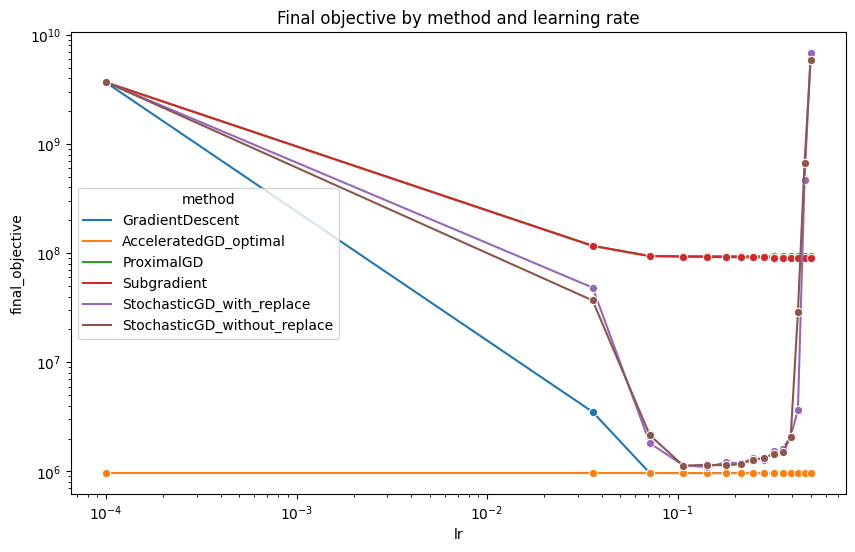

In [13]:
#plot the result of the gradient descent by method and by learning rate
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x='lr', y='final_objective', hue='method', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title('Final objective by method and learning rate')
plt.show()

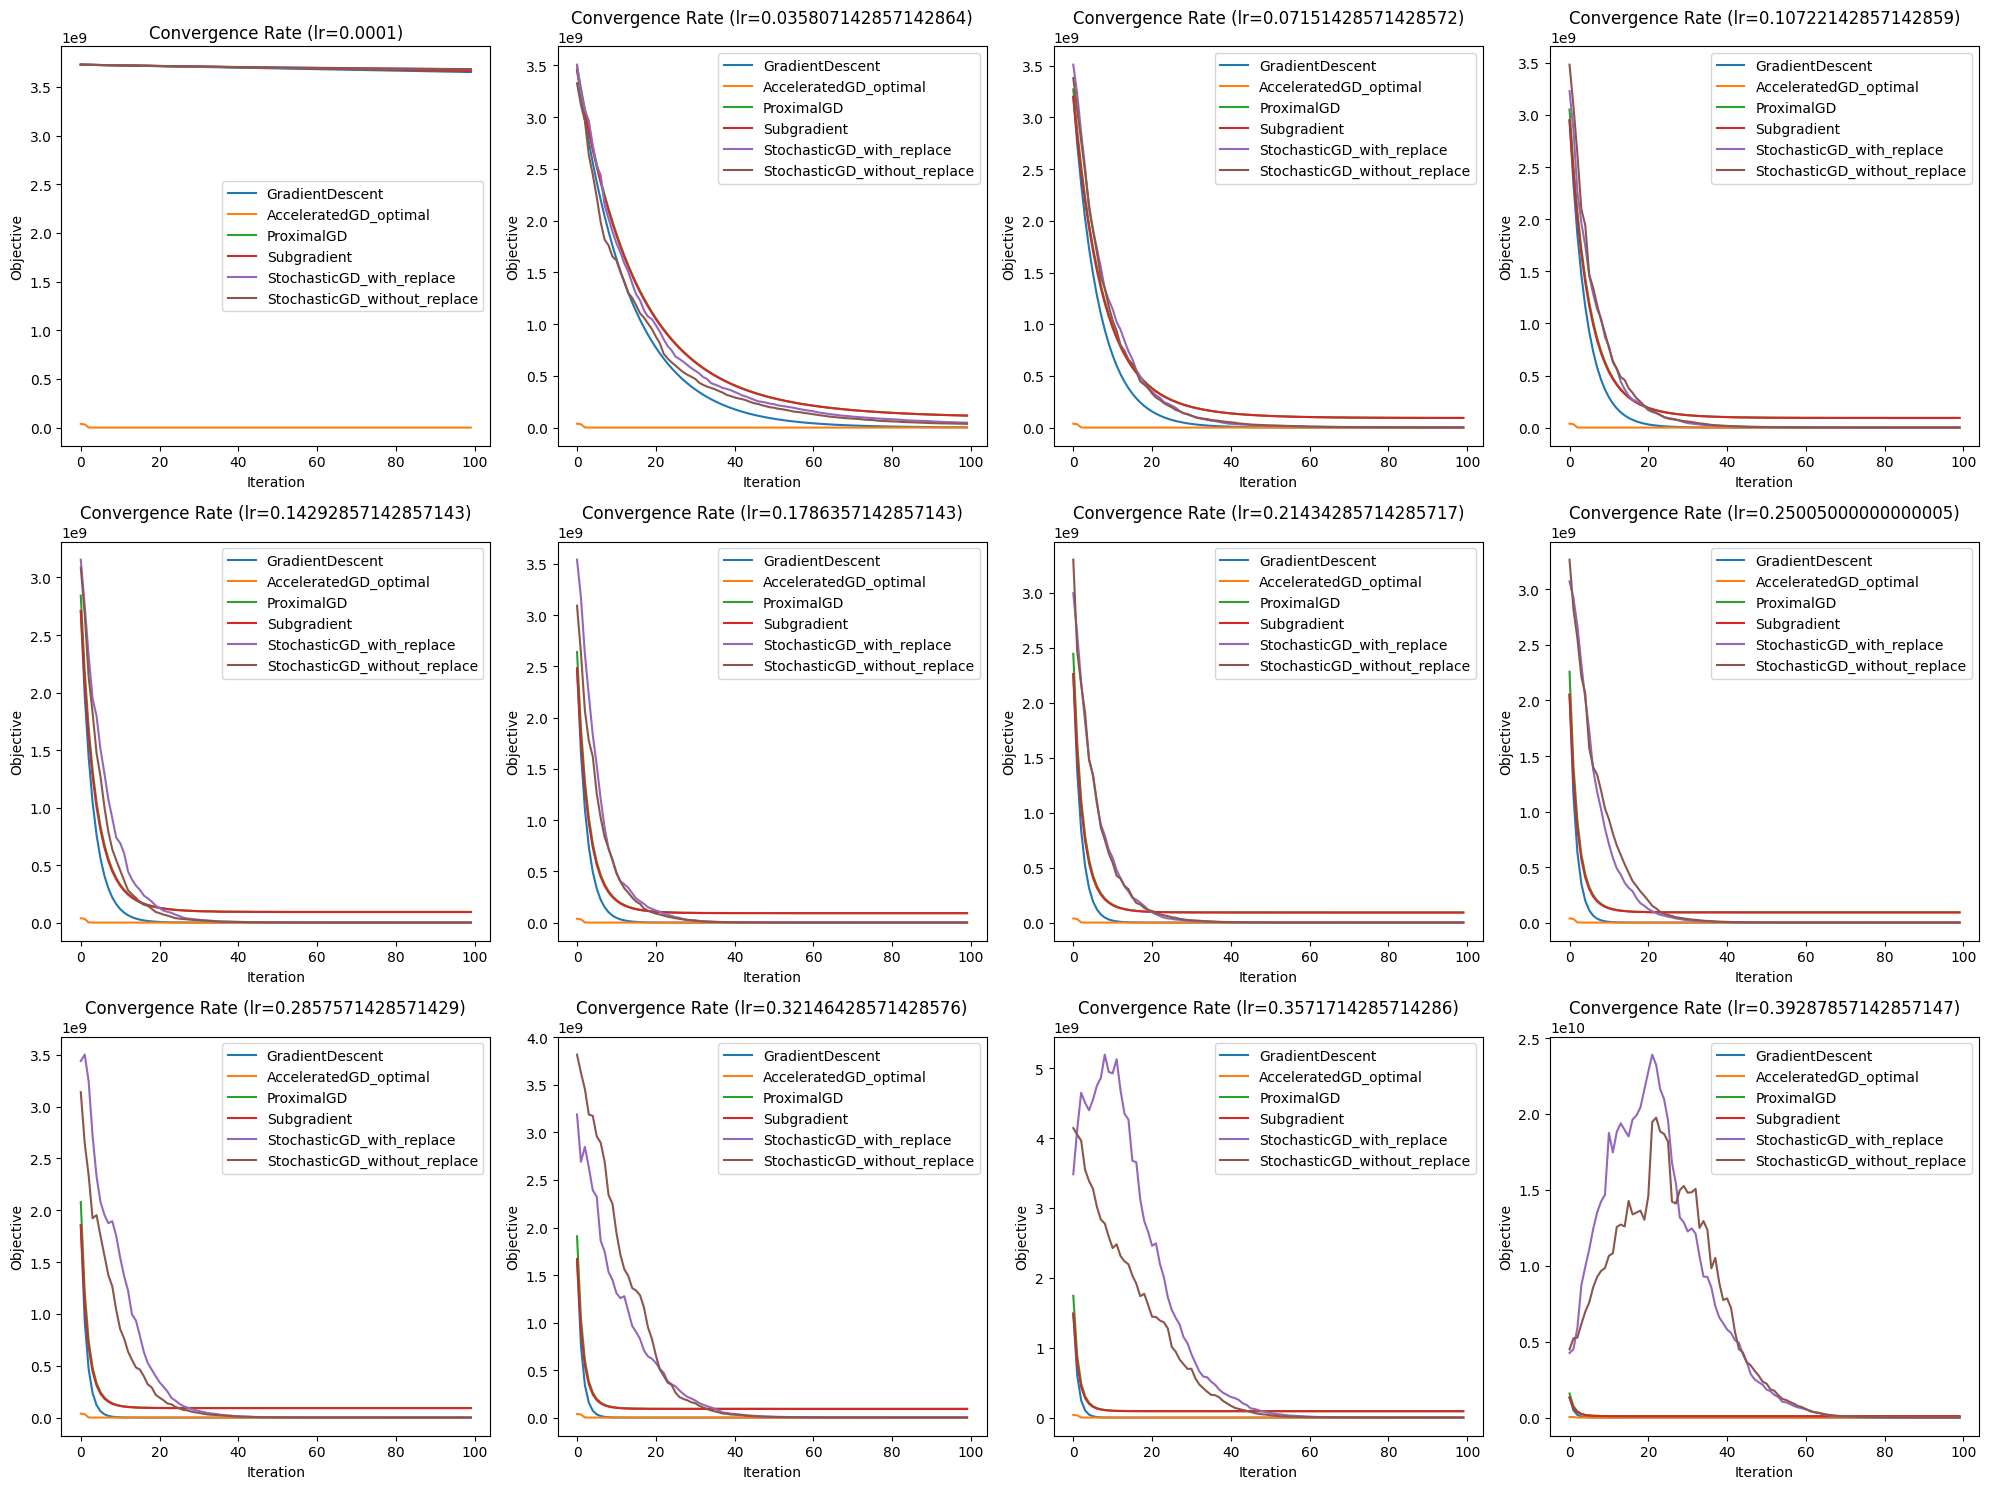

In [14]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for ax, lr in zip(axes, learning_rates):
    subset = df_results[df_results['lr'] == lr]
    for method in subset['method'].unique():
        method_data = subset[subset['method'] == method]
        for _, row in method_data.iterrows():
            ax.plot(range(num_iterations), row['objectives'], label=method)
    ax.set_title(f'Convergence Rate (lr={lr})')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Objective')
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
#for each learning rate plot the computation time by method
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x='lr', y='computation_time', hue='method', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title('Computation time by method and learning rate')
plt.show()
